In [1]:
""" Created on Sunday March 3rd 2025 @author: DONATUS """

' Created on Sunday March 3rd 2025 @author: DONATUS '

In [2]:
#Importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder #useful tool for converting categorical labels into a numerical format,
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [3]:
#Importing the dataset
loan = pd.read_csv('loan.csv')

In [4]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#shape of the data
loan.shape

(614, 13)

In [6]:
#Checking for null values
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#columns
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
columns = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

In [9]:
#filling the missing values with mode
loan['Gender'].fillna(loan['Gender'].mode()[0], inplace = True)
loan['Married'].fillna(loan['Married'].mode()[0], inplace = True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0], inplace = True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0], inplace = True)

loan['LoanAmount'].fillna(loan['LoanAmount'].mode()[0], inplace = True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0], inplace = True)
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0], inplace = True)



In [10]:
#chicking for null values again
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
loan.shape

(614, 13)

Visualizations and Counts

Gender
Male      502
Female    112
Name: count, dtype: int64

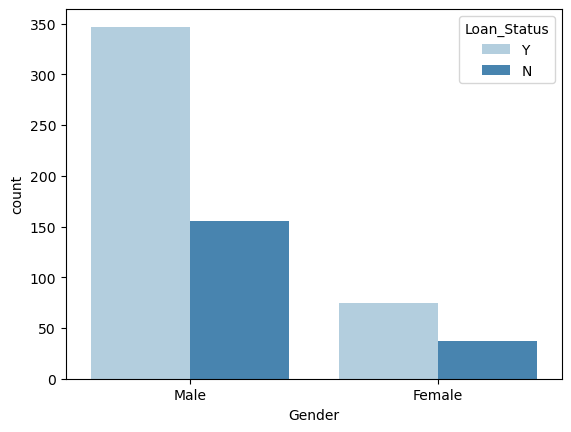

In [14]:

sns.countplot(x ='Gender', hue = 'Loan_Status', data = loan, palette ='Blues');

#Checking the Gender Status of loan Applicants
loan['Gender'].value_counts()


Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

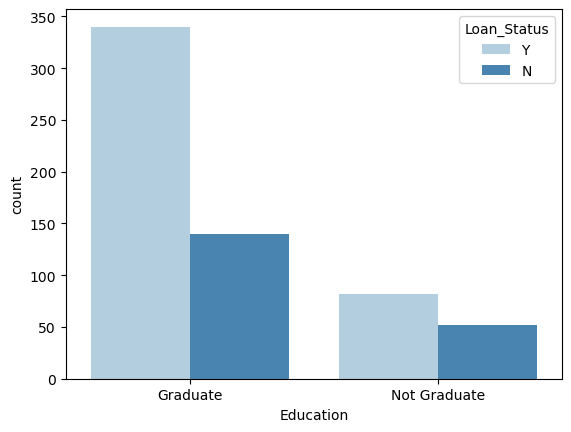

In [15]:
sns.countplot(x ='Education', hue = 'Loan_Status', data = loan, palette ='Blues');

#Checking Educational Status of loan Applicants

loan['Education'].value_counts()


Married
Yes    401
No     213
Name: count, dtype: int64

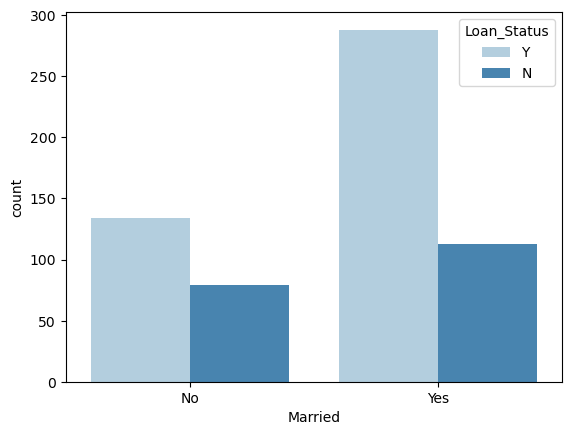

In [16]:
sns.countplot(x ='Married', hue = 'Loan_Status', data = loan, palette ='Blues');

#Checking the  Marrital Status of loan Applicants

loan['Married'].value_counts()

In [17]:
#Replacing 3+ in the 'Dependant' column with 4 so our model can read
loan.replace('3+', 4, inplace = True)

Dependents
0    360
1    102
2    101
4     51
Name: count, dtype: int64

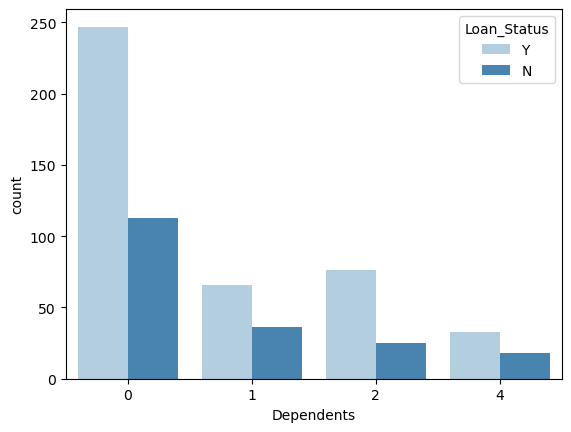

In [18]:
sns.countplot(x ='Dependents', hue = 'Loan_Status', data = loan, palette ='Blues');

#Checking the count of Dependents in the loan Applicants

loan['Dependents'].value_counts()

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

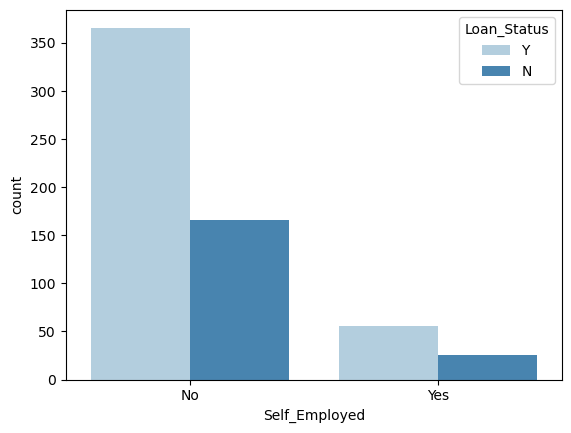

In [19]:
sns.countplot(x ='Self_Employed', hue = 'Loan_Status', data = loan, palette ='Blues');

#Checking the Employment Staus of loan Applicants

loan['Self_Employed'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

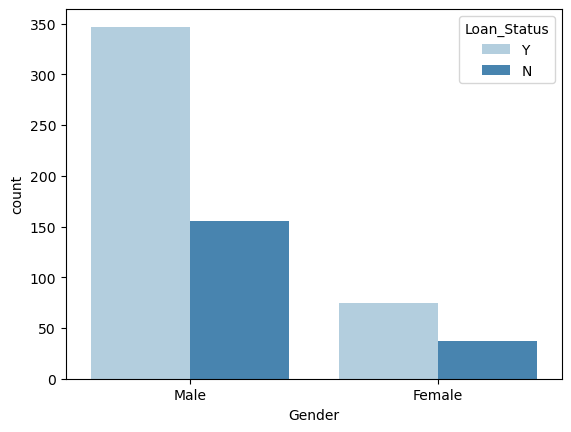

In [20]:
sns.countplot(x ='Gender', hue = 'Loan_Status', data = loan, palette ='Blues');

#Checking the Gender Status of loan Applicants

loan['Gender'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

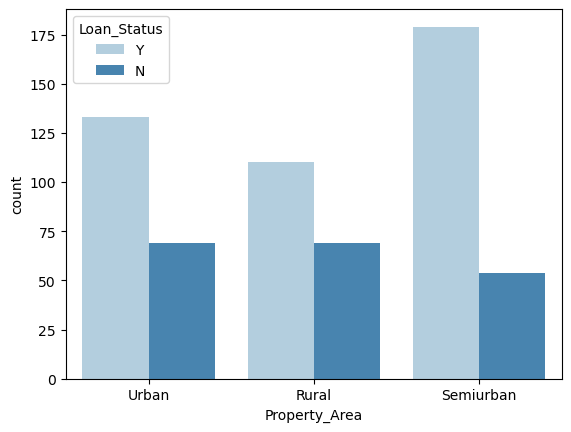

In [21]:
sns.countplot(x ='Property_Area', hue = 'Loan_Status', data = loan, palette ='Blues');

#Checking the classification of regions

loan['Property_Area'].value_counts()

In [22]:
#Replacing 3+ in the 'Dependant' column with 4 so our model can read
#data.replace('3+', 4, inplace = True)

In [23]:
#Renaming the 'target' columns to Loan_Statusabs

#data.rename(columns= {'target': 'Loan_Status'}, inplace = True)

In [24]:
loan_status_counts = loan['Loan_Status'].value_counts()

In [25]:

#Percentage of each loan status
loan_status_percentage = (loan_status_counts / loan_status_counts.sum()) * 100
# Print the results
print(loan_status_percentage)

Loan_Status
Y    68.729642
N    31.270358
Name: count, dtype: float64


Credit_History
1.0    525
0.0     89
Name: count, dtype: int64

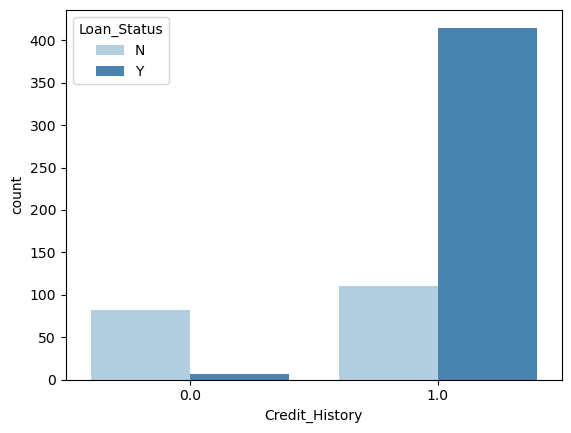

In [26]:
sns.countplot(x ='Credit_History', hue = 'Loan_Status', data = loan, palette ='Blues');

#Checking the count of Educated loan Applicants and non-educated
      
loan['Credit_History'].value_counts()

In [27]:
#statistical measures
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049
std,6109.041673,2926.248369,84.180967,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [28]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [29]:
columns = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

In [30]:
# Rename multiple columns and rename the new data
loan2 = loan.rename(columns={'ApplicantIncome': 'Applicant _Income', 'LoanAmount': 'Loan_Amount', 'CoapplicantIncome': 'Coapplicant_Income'})
loan2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant _Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [31]:
#data.replace({'Loan_Status':{'N': 0, 'Y': 1}}, inplace = True)

In [32]:
#x = data.drop(columns = 'Loan_Status')
#y = data['Loan_Status']

In [33]:
#loading the label encoder function, and it labels values between 0 and 1
label_encoder = LabelEncoder()

In [34]:
#transforming values of the data  to 0 nad 1
labels = label_encoder.fit_transform(loan2.Loan_Status)

0 = NO
1 = YES

In [36]:
#Appending the labels to the data frame. It will create a new column call target for the label encoding
loan2['target'] = labels

In [37]:
loan2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant _Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,target
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


In [38]:
#Droping the 'Loan_Status' since we now have a new column 'target' to replace the Loan_Status
loan2.drop(columns = 'Loan_Status', inplace = True)

In [39]:
loan2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant _Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,target
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [40]:
#Renaming the 'target' columns to Loan_Statusabs

loan2.rename(columns= {'target': 'Loan_Status'}, inplace = True)

In [41]:
loan2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant _Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [42]:
#Converting columns with text format to numerical values for the model to be able to interprete
loan2.replace({'Married':{'No':0, 'Yes': 1},
              'Education':{'Not Graduate':0, 'Graduate': 1},
              'Self_Employed':{'No':0, 'Yes': 1},
               'Property_Area':{'Rural':0, 'Semiurban': 1, 'Urban': '2'},
               'Gender':{'Female':0, 'Male': 1}}, inplace = True)

In [43]:
loan2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant _Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [44]:
#Seperating the Features from Target

x = loan2.drop(columns = 'Loan_Status', axis = 1)
y = loan2['Loan_Status']

In [45]:
print(x)

      Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0    LP001002       1        0          0          1              0   
1    LP001003       1        1          1          1              0   
2    LP001005       1        1          0          1              1   
3    LP001006       1        1          0          0              0   
4    LP001008       1        0          0          1              0   
..        ...     ...      ...        ...        ...            ...   
609  LP002978       0        0          0          1              0   
610  LP002979       1        1          4          1              0   
611  LP002983       1        1          1          1              0   
612  LP002984       1        1          2          1              0   
613  LP002990       0        0          0          1              1   

     Applicant _Income  Coapplicant_Income  Loan_Amount  Loan_Amount_Term  \
0                 5849                 0.0        120.0             36

In [46]:
print(y)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32


In [47]:
#Dropping the 'Loan_ID' column
loan2.drop(columns = 'Loan_ID', inplace = True)

In [48]:
loan2

,Gender,Married,Dependents,Education,Self_Employed,Applicant _Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [49]:
loan2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              614 non-null    int64  
 1   Married             614 non-null    int64  
 2   Dependents          614 non-null    object 
 3   Education           614 non-null    int64  
 4   Self_Employed       614 non-null    int64  
 5   Applicant _Income   614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    float64
 8   Loan_Amount_Term    614 non-null    float64
 9   Credit_History      614 non-null    float64
 10  Property_Area       614 non-null    object 
 11  Loan_Status         614 non-null    int32  
dtypes: float64(4), int32(1), int64(5), object(2)
memory usage: 55.3+ KB


In [50]:
loan2.shape

(614, 12)

In [51]:
loan2.shape

(614, 12)

In [52]:
#Converting 'Dependents' column to integer
#loan2['Dependents'] = loan2['Dependents'].astype(int)

# Convert 'Property_Area' column to integer
#loan2['Property_Area'] = loan2['Property_Area'].astype(int)

In [53]:
#loan2.info()

In [54]:
#Seperating the Features from the  Target

x = loan2.drop(columns = 'Loan_Status', axis = 1)
y = loan2['Loan_Status']

In [55]:
print(x)

     Gender  Married Dependents  Education  Self_Employed  Applicant _Income  \
0         1        0          0          1              0               5849   
1         1        1          1          1              0               4583   
2         1        1          0          1              1               3000   
3         1        1          0          0              0               2583   
4         1        0          0          1              0               6000   
..      ...      ...        ...        ...            ...                ...   
609       0        0          0          1              0               2900   
610       1        1          4          1              0               4106   
611       1        1          1          1              0               8072   
612       1        1          2          1              0               7583   
613       0        0          0          1              1               4583   

     Coapplicant_Income  Loan_Amount  L

In [56]:
print(y)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32


In [57]:
#Data standardization; to convert the values to a common range between 0 & 1 for our ML prediction we use the function 
scaler = StandardScaler()


In [58]:
#Fitting and transforming the 'x' data into the scaler to be in a common range
standardized_data = scaler.fit_transform(x)

In [59]:
#loan2['Dependents'] = loan['Dependents'].astype(int)

In [60]:
#Printing the 'standardized_data' data
print(standardized_data)

[[ 0.47234264 -1.37208932 -0.6827291  ...  0.2732313   0.41173269
   1.22329839]
 [ 0.47234264  0.72881553  0.14245922 ...  0.2732313   0.41173269
  -1.31851281]
 [ 0.47234264  0.72881553 -0.6827291  ...  0.2732313   0.41173269
   1.22329839]
 ...
 [ 0.47234264  0.72881553  0.14245922 ...  0.2732313   0.41173269
   1.22329839]
 [ 0.47234264  0.72881553  0.96764754 ...  0.2732313   0.41173269
   1.22329839]
 [-2.11710719 -1.37208932 -0.6827291  ...  0.2732313  -2.42876026
  -0.04760721]]


In [61]:
x = standardized_data

In [62]:
print(x)

[[ 0.47234264 -1.37208932 -0.6827291  ...  0.2732313   0.41173269
   1.22329839]
 [ 0.47234264  0.72881553  0.14245922 ...  0.2732313   0.41173269
  -1.31851281]
 [ 0.47234264  0.72881553 -0.6827291  ...  0.2732313   0.41173269
   1.22329839]
 ...
 [ 0.47234264  0.72881553  0.14245922 ...  0.2732313   0.41173269
   1.22329839]
 [ 0.47234264  0.72881553  0.96764754 ...  0.2732313   0.41173269
   1.22329839]
 [-2.11710719 -1.37208932 -0.6827291  ...  0.2732313  -2.42876026
  -0.04760721]]


In [63]:
print(y)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32


In [64]:
#loan2.to_csv('C:/Users/DONATUS/Desktop/DataScience/MLEngr/focus/pythonML/MLprojects_part2\standardized_loan.csv', index = False)

Spliting the Data into Training 80% & Test 20%

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y, random_state= 2)

In [67]:
loan2.shape, x_train.shape, x_test.shape

((614, 12), (491, 11), (123, 11))

Model Training using Suport Vector Machine

In [69]:
classifier = svm.SVC(kernel = 'linear')

In [70]:
#Fitting our training data into the classifier
# x_training data and y_train is the label
classifier.fit(x_train, y_train)

SVC(kernel='linear')

Model Evaluation

In [72]:
x_train_prediction = classifier.predict(x_train) 

training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [73]:
#Accuracy score of the train data

print('Accuracy score of the Training Data is:', training_data_accuracy)

Accuracy score of the Training Data is: 0.8105906313645621


In [74]:
#Evaluating the model to know the accuracy the test data

x_test_prediction = classifier.predict(x_test)

test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [75]:
print('Accuracy score of the Test Data is:', test_data_accuracy)

Accuracy score of the Test Data is: 0.8048780487804879


In [76]:
#Making a predictive system
input_data = (1,0,0,1,0,5849,0.0,120.0,360.0,1.0,2)

#Changing the input data to numpy arrray since the processing is more efficient
convert_data_to_numpy = np.asarray(input_data)

#reshaping the array as we are predicting for one data point
#parameter for reshaping ==> '.reshape(1, -1)'
reshape_input_data = convert_data_to_numpy.reshape(1, -1)

#standardizing the input_data
std_data = scaler.transform(reshape_input_data)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if prediction==0:
    print("We're sorry, Your Loan has not Approved.")
else:
    print('Congratulations, Your Loan has been Approved.') 

[[ 0.47234264 -1.37208932 -0.6827291   0.52836225 -0.39260074  0.07299082
  -0.55448733 -0.30275919  0.2732313   0.41173269  1.22329839]]
[1]
Congratulations, Your Loan has been Approved.


In [77]:
#Making a predictive system
input_data = (1,1,4,1,0,3036,2504.0,158.0,360.0,0.0,1)

#Changing the input data to numpy arrray since the processing is more efficient
convert_data_to_numpy = np.asarray(input_data)

#reshaping the array as we are predicting for one data point
#parameter for reshaping ==> '.reshape(1, -1)'
reshape_input_data = convert_data_to_numpy.reshape(1, -1)

#standardizing the input_data
std_data = scaler.transform(reshape_input_data)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if prediction==0:
    print("We're sorry, Your L  oan has not been Approved.")
else:
    print('Congratulations, Your Loan has been Approved.') 

[[ 0.47234264  0.72881553  2.61802418  0.52836225 -0.39260074 -0.38784963
   0.30191352  0.14901731  0.2732313  -2.42876026 -0.04760721]]
[0]
We're sorry, Your L  oan has not been Approved.


In [78]:
import pickle

In [79]:
classifier

SVC(kernel='linear')

In [80]:
#creating a variable to saved the  the trained model
filename = 'loan_classifier.sav'
#standard_scaler = 'scaler.sav'

In [81]:
pickle.dump(classifier,open('loan_classifier.sav','wb'))
#pickle.dump(scaler,open('scaler.sav', 'wb'))

In [82]:
#loading the saved model 
loaded_model = pickle.load(open('loan_classifier.sav', 'rb'))
#standard_scaler = pickle.load(open('scaler.sav', 'rb'))

In [83]:
#Making a predictive system
input_data = (1,0,0,1,0,5849,0.0,120.0,360.0,1.0,2)

#Changing the input data to numpy arrray since the processing is more efficient
convert_data_to_numpy = np.asarray(input_data)

#reshaping the array as we are predicting for one data point
#parameter for reshaping ==> '.reshape(1, -1)'
reshape_input_data = convert_data_to_numpy.reshape(1, -1)

#standardizing the input_data
#std_data = scaler.transform(reshape_input_data)
#print(std_data)

prediction = loaded_model.predict(reshape_input_data)
print(prediction)

if prediction==0:
    print("We're sorry, Your Loan has not Approved.")
else:
    print('Congratulations, Your Loan has been Approved.') 

[1]
Congratulations, Your Loan has been Approved.


In [84]:
!pip install streamlit

In [85]:
import subprocess

# Start the Streamlit app
subprocess.Popen(["streamlit", "run", "app.py"])

<Popen: returncode: None args: ['streamlit', 'run', 'app.py']>